In [ ]:
#!pip install CoolProp
import math
from CoolProp.CoolProp import PropsSI

# Input Parameters
# ----------------
# CO2 Properties
flow_rate = 3.3 / 1000 / 60  # Flow rate in m³/s (3.3 L/min)
pressure_inlet = 132e5  # Inlet pressure in Pa (132 bar)
temperature_inlet = 5 + 273.15  # Inlet temperature in K (40°C)
viscosity_co2 = 0.057e-3  # Approx. dynamic viscosity of CO2 in Pa·s

def get_co2_density(pressure, temperature):
    """Get CO2 density using CoolProp based on pressure and temperature."""
    return PropsSI('D', 'P', pressure, 'T', temperature, 'CO2')

# Calculate density at the inlet
density_co2 = get_co2_density(pressure_inlet, temperature_inlet)

# Pipe Dimensions (inner diameters in meters)
diameter_half_inch = 0.0127  # 1/2" tubing
diameter_three_quarter_inch = 0.01905  # 3/4" tubing

# Pipe Sections
length_half_inch = 2.1498 + 1.1391 + 1.5427 + 3.2836 + 2.4409 + 1.3893 + 4.3697 + 0.7215 + 2.6055 + 2.9928 + 1.9096 + 1.2100 + 1.6504  # Total length of 1/2" section in meters
length_three_quarter_inch = 2.0 + 1.8 + 1.2 + 2.6 + 2.0  # Total length of 3/4" section in meters

# Bends and Fittings
bends_half_inch = {"90_deg": 13, "45_deg": 4}
bends_three_quarter_inch = {"90_deg": 6, "45_deg": 0}

# Loss coefficients for bends
k_90_deg = 0.9  # 90-degree bend loss coefficient
k_45_deg = 0.4  # 45-degree bend loss coefficient

# Helper Functions
# -----------------
def calculate_pressure_drop(length, diameter, bends_90, bends_45, flow_rate, density, viscosity):
    """
    Calculate the pressure drop in a pipe section using the Darcy-Weisbach equation.
    Includes friction losses and losses due to bends.
    """
    # Cross-sectional area and velocity
    area = math.pi * (diameter / 2) ** 2
    velocity = flow_rate / area

    # Reynolds number
    reynolds_number = (density * velocity * diameter) / viscosity

    # Friction factor using Blasius correlation (valid for turbulent flow)
    if reynolds_number > 4000:
        friction_factor = 0.3164 * reynolds_number ** -0.25
    else:  # For laminar flow (unlikely here)
        friction_factor = 64 / reynolds_number

    # Frictional pressure drop (straight pipe)
    frictional_loss = friction_factor * (length / diameter) * (density * velocity ** 2 / 2)

    # Pressure drop due to bends
    bend_loss = (bends_90 * k_90_deg + bends_45 * k_45_deg) * (density * velocity ** 2 / 2)

    # Total pressure drop
    total_pressure_drop = frictional_loss + bend_loss
    return total_pressure_drop, velocity, reynolds_number

# Pressure Drop Calculations
# ---------------------------
pressure_drop_half_inch, velocity_half_inch, reynolds_half_inch = calculate_pressure_drop(
    length=length_half_inch,
    diameter=diameter_half_inch,
    bends_90=bends_half_inch["90_deg"],
    bends_45=bends_half_inch["45_deg"],
    flow_rate=flow_rate,
    density=density_co2,
    viscosity=viscosity_co2,
)

pressure_drop_three_quarter_inch, velocity_three_quarter_inch, reynolds_three_quarter_inch = calculate_pressure_drop(
    length=length_three_quarter_inch,
    diameter=diameter_three_quarter_inch,
    bends_90=bends_three_quarter_inch["90_deg"],
    bends_45=bends_three_quarter_inch["45_deg"],
    flow_rate=flow_rate,
    density=density_co2,
    viscosity=viscosity_co2,
)

# Convert pressure drops to bar
pressure_drop_half_inch_bar = pressure_drop_half_inch / 1e5  # Pa to bar
pressure_drop_three_quarter_inch_bar = pressure_drop_three_quarter_inch / 1e5  # Pa to bar

total_pressure_drop_bar = pressure_drop_half_inch_bar + pressure_drop_three_quarter_inch_bar

# Total lengths and number of bends
total_length_half_inch = length_half_inch
number_of_bends_half_inch = bends_half_inch["90_deg"] + bends_half_inch["45_deg"]

total_length_three_quarter_inch = length_three_quarter_inch
number_of_bends_three_quarter_inch = bends_three_quarter_inch["90_deg"] + bends_three_quarter_inch["45_deg"]

# Results
# -------
print("Results:")
print("Input Parameters:")
print(f"  CO2 Flow Rate: {flow_rate * 1000 * 60:.2f} L/min")
print(f"  CO2 Density: {density_co2:.2f} kg/m³")
print(f"  CO2 Viscosity: {viscosity_co2:.6f} Pa·s")
print(f"  Pipe Inlet Pressure: {pressure_inlet / 1e5:.2f} bar")
print(f"  Pipe Inlet Temperature: {temperature_inlet - 273.15:.2f} °C")

print(f"\n1/2\" Section:")
print(f"  Total Length: {total_length_half_inch:.2f} m")
print(f"  Number of Bends: {number_of_bends_half_inch}")
print(f"  Pressure Drop: {pressure_drop_half_inch_bar:.5f} bar")
print(f"  Velocity: {velocity_half_inch:.3f} m/s")
print(f"  Reynolds Number: {reynolds_half_inch:.0f}")

print(f"\n3/4\" Section:")
print(f"  Total Length: {total_length_three_quarter_inch:.2f} m")
print(f"  Number of Bends: {number_of_bends_three_quarter_inch}")
print(f"  Pressure Drop: {pressure_drop_three_quarter_inch_bar:.5f} bar")
print(f"  Velocity: {velocity_three_quarter_inch:.3f} m/s")
print(f"  Reynolds Number: {reynolds_three_quarter_inch:.0f}")

print(f"\nTotal System:")
print(f"  Total Pressure Drop: {total_pressure_drop_bar:.5f} bar")


Results:
Input Parameters:
  CO2 Flow Rate: 3.30 L/min
  CO2 Density: 967.74 kg/m³
  CO2 Viscosity: 0.000057 Pa·s
  Pipe Inlet Pressure: 132.00 bar
  Pipe Inlet Temperature: 5.00 °C

1/2" Section:
  Total Length: 27.40 m
  Number of Bends: 17
  Pressure Drop: 0.04773 bar
  Velocity: 0.434 m/s
  Reynolds Number: 93617

3/4" Section:
  Total Length: 9.60 m
  Number of Bends: 6
  Pressure Drop: 0.00279 bar
  Velocity: 0.193 m/s
  Reynolds Number: 62411

Total System:
  Total Pressure Drop: 0.05052 bar


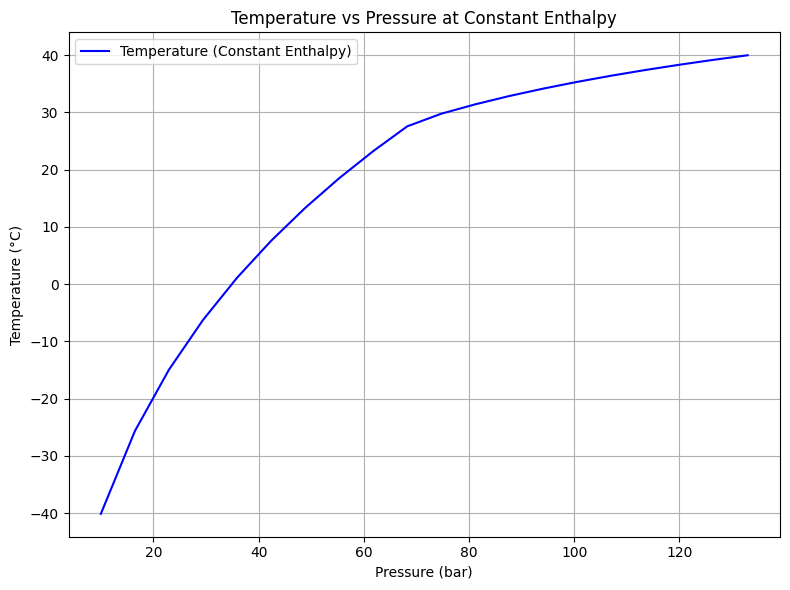

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI

# Input Parameters
pressure_inlet = 133e5  # Initial pressure in Pa (133 bar)
pressure_outlet = 10e5  # Final pressure in Pa (1 bar)
temperature_inlet = 40 + 273.15  # Inlet temperature in K (40°C)
pressure_steps = 20  # Number of steps for pressure reduction

# Create pressure range
pressures = np.linspace(pressure_inlet, pressure_outlet, pressure_steps)

# Calculate constant enthalpy temperature
enthalpy = PropsSI('H', 'P', pressure_inlet, 'T', temperature_inlet, 'CO2')
temperatures = [PropsSI('T', 'P', P, 'H', enthalpy, 'CO2') for P in pressures]

# Convert pressures to bar and temperatures to Celsius
pressures_bar = pressures / 1e5
temperatures_celsius = [T - 273.15 for T in temperatures]

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(pressures_bar, temperatures_celsius, label="Temperature (Constant Enthalpy)", color="blue")
plt.xlabel("Pressure (bar)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs Pressure at Constant Enthalpy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




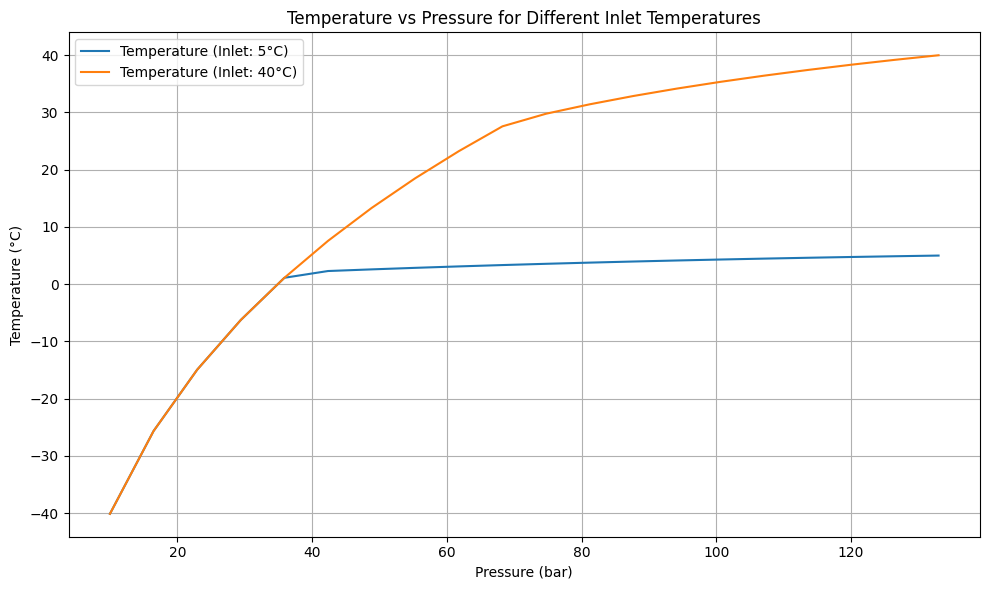

In [53]:
#!pip install CoolProp
import math
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI

# Input Parameters
# ----------------
# CO2 Properties
pressure_inlet = 133e5  # Initial pressure in Pa (133 bar)
pressure_outlet = 10e5  # Final pressure in Pa (1 bar)
temperature_inlets_celcius = [5, 40]  # Inlet temperatures in C
temperature_inlets = [T + 273.15 for T in temperature_inlets_celcius]
pressure_steps = 20  # Number of steps for pressure reduction

# Create pressure range
pressures = np.linspace(pressure_inlet, pressure_outlet, pressure_steps)

# Plotting Results
# ----------------
plt.figure(figsize=(10, 6))

for temperature_inlet in temperature_inlets:
    # Initialize lists to store results for each temperature

    # Calculate constant enthalpy temperature
    enthalpy = PropsSI('H', 'P', pressure_inlet, 'T', temperature_inlet, 'CO2')
    temperatures = [PropsSI('T', 'P', P, 'H', enthalpy, 'CO2') for P in pressures]

    # Convert pressures to bar and temperatures to Celsius
    pressures_bar = pressures / 1e5
    temperatures_celsius = [T - 273.15 for T in temperatures]

    # Plot temperature vs pressure for the current temperature_inlet
    plt.plot(pressures_bar, temperatures_celsius, label=f"Temperature (Inlet: {temperature_inlet - 273.15:.0f}°C)",)

# Plot settings
plt.xlabel("Pressure (bar)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs Pressure for Different Inlet Temperatures")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Skipping pressure 73.00 bar due to phase: unknown
Skipping pressure 72.00 bar due to phase: unknown
Skipping pressure 71.00 bar due to phase: unknown
Skipping pressure 70.00 bar due to phase: unknown
Skipping pressure 69.00 bar due to phase: unknown
Skipping pressure 68.00 bar due to phase: unknown
Skipping pressure 67.00 bar due to phase: unknown
Skipping pressure 66.00 bar due to phase: unknown
Skipping pressure 65.00 bar due to phase: unknown
Skipping pressure 64.00 bar due to phase: unknown
Skipping pressure 63.00 bar due to phase: unknown
Skipping pressure 62.00 bar due to phase: unknown
Skipping pressure 61.00 bar due to phase: unknown
Skipping pressure 60.00 bar due to phase: unknown
Skipping pressure 59.00 bar due to phase: unknown
Skipping pressure 58.00 bar due to phase: unknown
Skipping pressure 57.00 bar due to phase: unknown
Skipping pressure 56.00 bar due to phase: unknown
Skipping pressure 55.00 bar due to phase: unknown
Skipping pressure 54.00 bar due to phase: unknown


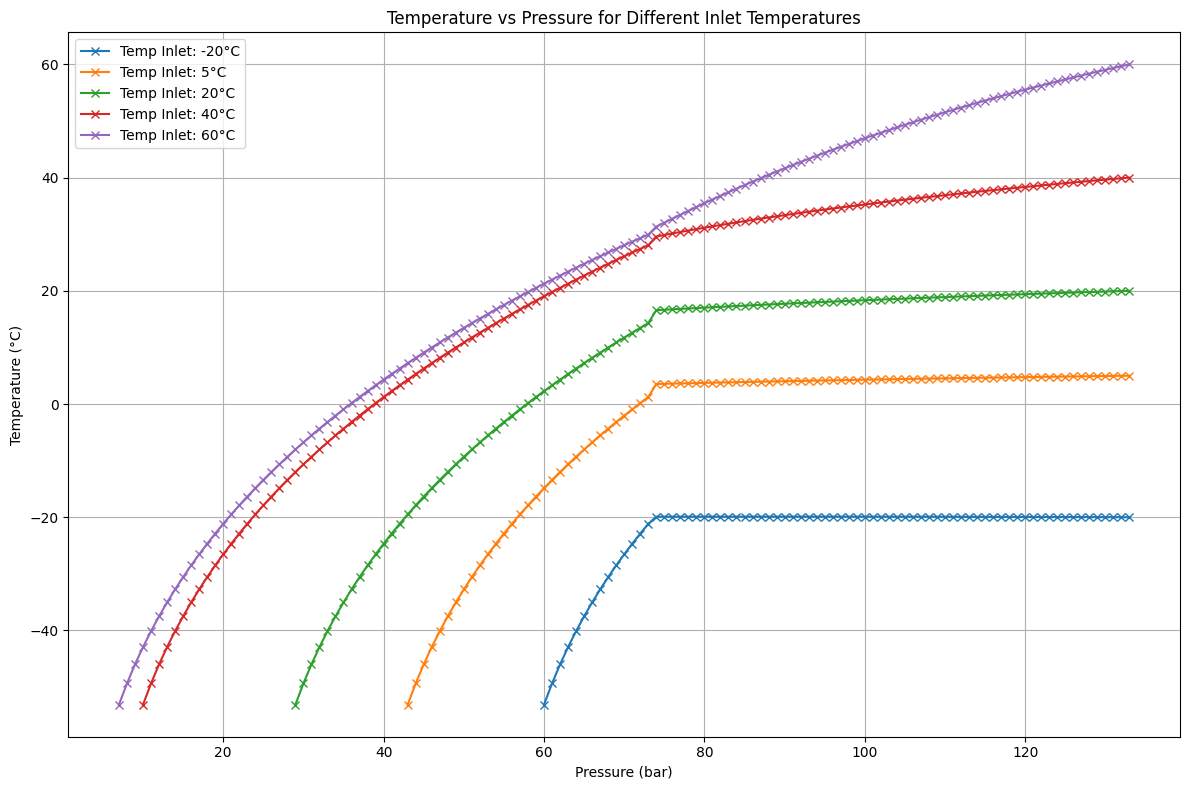

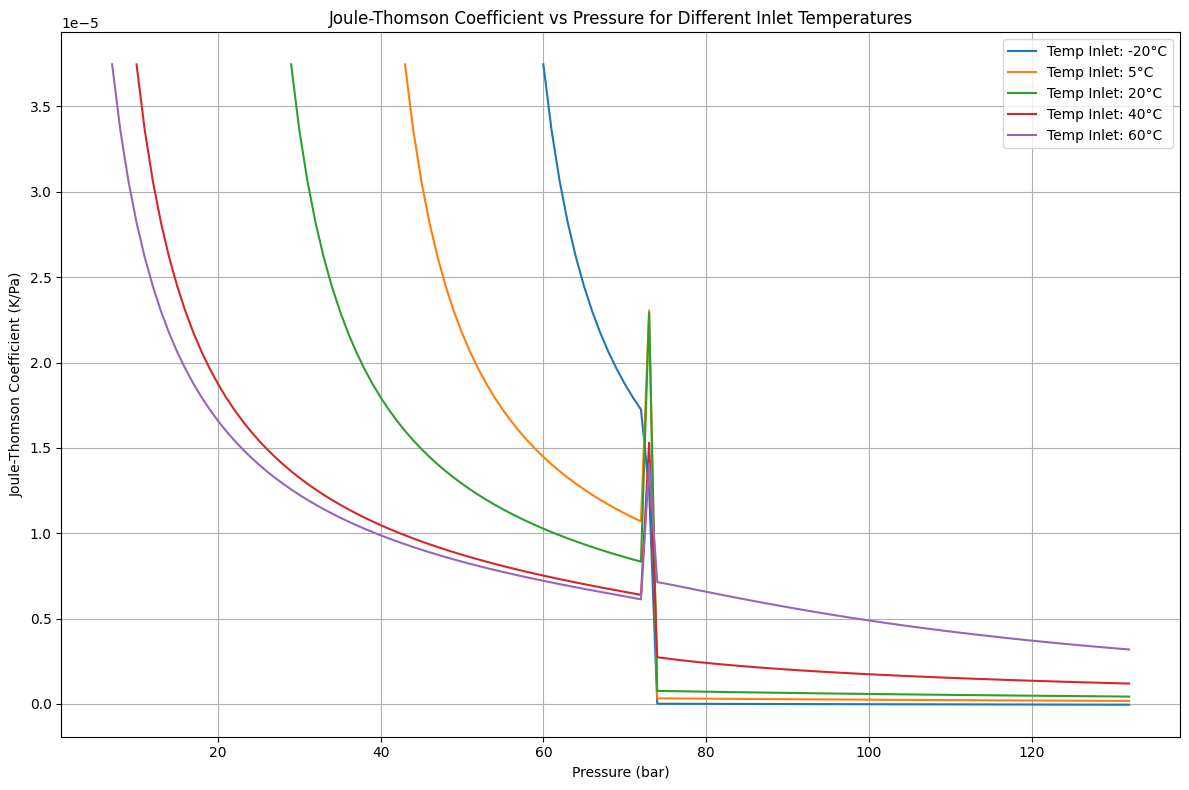

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI


# Input Parameters
pressure_inlet = 133e5  # Initial pressure in Pa (133 bar)
pressure_outlet = 1e5  # Final pressure in Pa (1 bar)
temperature_inlets_celcius = [-20, 5, 20, 40, 60]  # Inlet temperatures in C
temperature_inlets = [T + 273.15 for T in temperature_inlets_celcius]
pressure_steps = 133   # Number of steps for pressure reduction

# Create pressure range
pressures = np.linspace(pressure_inlet, pressure_outlet, pressure_steps)

# Phase mapping
phase_mapping = {
    0: "unknown",
    1: "liquid",
    2: "two-phase",
    3: "gas",
    6: "supercritical"
}

# Plotting Results
plt.figure(figsize=(12, 8))

for temperature_inlet in temperature_inlets:
    # Initialize lists to store results for each temperature
    temperatures = []
    jt_coefficients = []

    # Calculate constant enthalpy temperature and JT coefficient
    enthalpy = PropsSI('H', 'P', pressure_inlet, 'T', temperature_inlet, 'CO2')

    for P in pressures:
        try:
            # Check if the pressure-temperature combination is valid
            phase_code = PropsSI('Phase', 'P', P, 'H', enthalpy, 'CO2')

            phase = phase_mapping.get(int(phase_code), "unknown")

            if phase not in ["liquid", "gas", "supercritical"]:
                # Skip if in a two-phase or invalid state
                print(f"Skipping pressure {P / 1e5:.2f} bar due to phase: {phase}")
                continue

            # Calculate temperature at constant enthalpy
            T = PropsSI('T', 'P', P, 'H', enthalpy, 'CO2')
            temperatures.append(T)

            # Calculate Joule-Thomson coefficient numerically
            if len(temperatures) > 1:
                jt_coefficient = (temperatures[-1] - temperatures[-2]) / (pressures[1] - pressures[0])
            else:
                jt_coefficient = None

            jt_coefficients.append(jt_coefficient)

        except ValueError as e:
            print(f"Error at P = {P / 1e5:.2f} bar: {e}")
            break

    # Convert pressures to bar and temperatures to Celsius
    pressures_bar = pressures[:len(temperatures)] / 1e5
    temperatures_celsius = [T - 273.15 for T in temperatures]

    # Plot temperature vs pressure for the current temperature_inlet
    plt.plot(pressures_bar, temperatures_celsius, label=f"Temp Inlet: {temperature_inlet - 273.15:.0f}°C",marker='x')

# Plot settings for temperature
plt.xlabel("Pressure (bar)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs Pressure for Different Inlet Temperatures")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting JT Coefficients
plt.figure(figsize=(12, 8))

for temperature_inlet in temperature_inlets:
    # Recalculate JT coefficients and pressures for plotting
    temperatures = []
    jt_coefficients = []
    enthalpy = PropsSI('H', 'P', pressure_inlet, 'T', temperature_inlet, 'CO2')

    for P in pressures:
        try:
            # Check if the pressure-temperature combination is valid
            phase_code = PropsSI('Phase', 'P', P, 'H', enthalpy, 'CO2')
            phase = phase_mapping.get(int(phase_code), "unknown")

            if phase not in ["liquid", "gas", "supercritical"]:
                continue

            # Calculate temperature at constant enthalpy
            T = PropsSI('T', 'P', P, 'H', enthalpy, 'CO2')
            temperatures.append(T)

            # Calculate Joule-Thomson coefficient numerically
            if len(temperatures) > 1:
                jt_coefficient = (temperatures[-1] - temperatures[-2]) / (pressures[1] - pressures[0])
            else:
                jt_coefficient = None

            jt_coefficients.append(jt_coefficient)

        except ValueError:
            continue

    # Convert pressures to bar
    pressures_bar = pressures[:len(jt_coefficients)] / 1e5

    # Plot JT coefficient vs pressure
    plt.plot(pressures_bar, jt_coefficients, label=f"Temp Inlet: {temperature_inlet - 273.15:.0f}°C")

plt.xlabel("Pressure (bar)")
plt.ylabel("Joule-Thomson Coefficient (K/Pa)")
plt.title("Joule-Thomson Coefficient vs Pressure for Different Inlet Temperatures")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# New section